In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
all_data = pd.read_pickle('./data/all_data.pkl')
print(all_data)

           Date    Type Opponent    Tm    Opp                       Team
0    2023-11-06     REG    UConn  52.0   95.0           Northern Arizona
1    2023-11-11     REG    UConn  67.0  107.0                  Stonehill
2    2023-11-14     REG    UConn  53.0   87.0   Mississippi Valley State
3    2023-11-19     REG    UConn  57.0   77.0                    Indiana
4    2023-11-20     REG    UConn  71.0   81.0                      Texas
...         ...     ...      ...   ...    ...                        ...
2372 2024-03-06  CTOURN   Wagner  57.0   60.0               Sacred Heart
2373 2024-03-09  CTOURN   Wagner  56.0   66.0  Central Connecticut State
2374 2024-03-12  CTOURN   Wagner  47.0   54.0                  Merrimack
2375 2024-03-19    NCAA   Wagner  68.0   71.0                     Howard
2376 2024-03-21    NCAA   Wagner  90.0   62.0             North Carolina

[1157 rows x 6 columns]


341


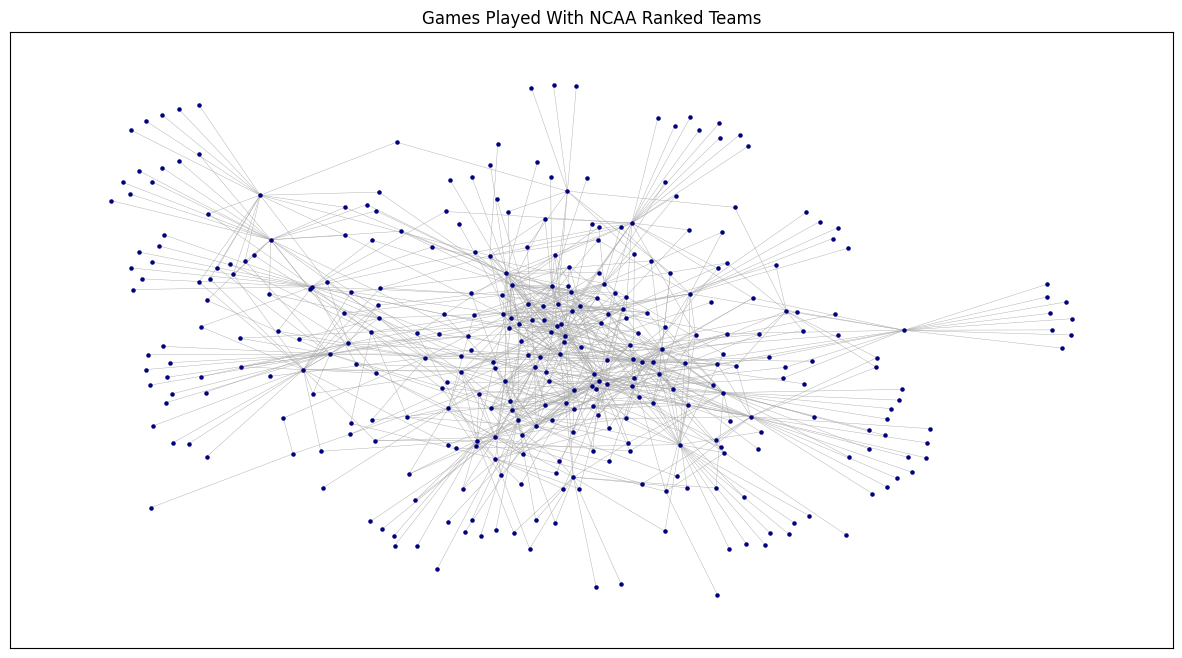

In [20]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

# Define the position of nodes
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams')
plt.show()

219


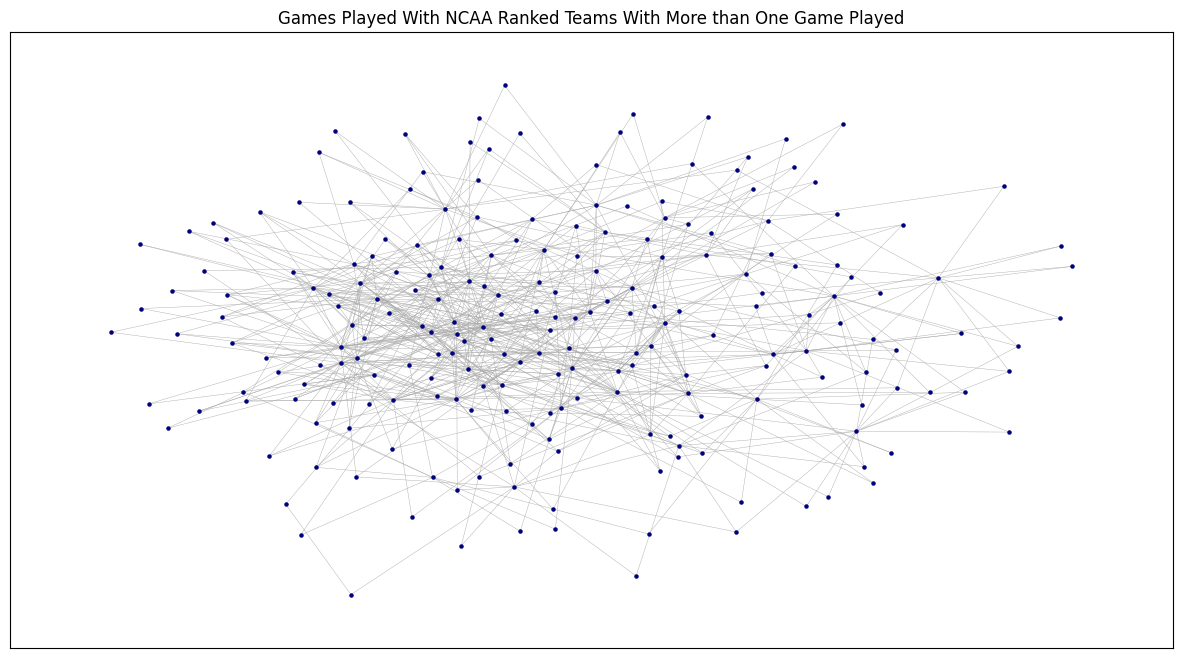

In [23]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

nodes_with_one_connection = [node for node in G.nodes() if G.degree(node) <= 1]
G.remove_nodes_from(nodes_with_one_connection)


# Define the position of nodes
pos = nx.spring_layout(G)


# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams With More than One Game Played')
plt.show()




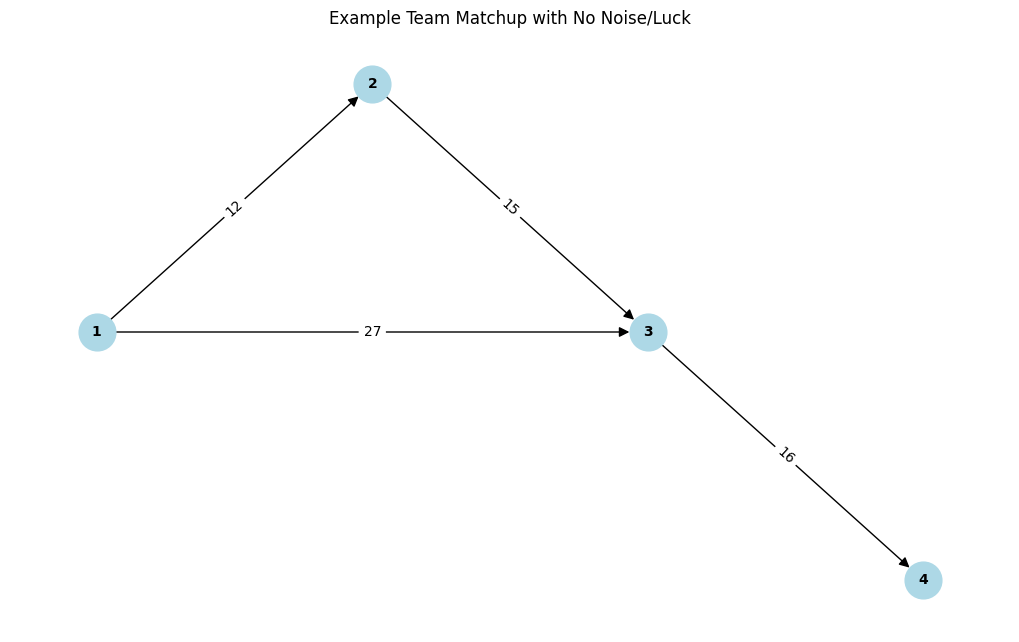

In [36]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0)
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Example Team Matchup with No Noise/Luck")
plt.show()


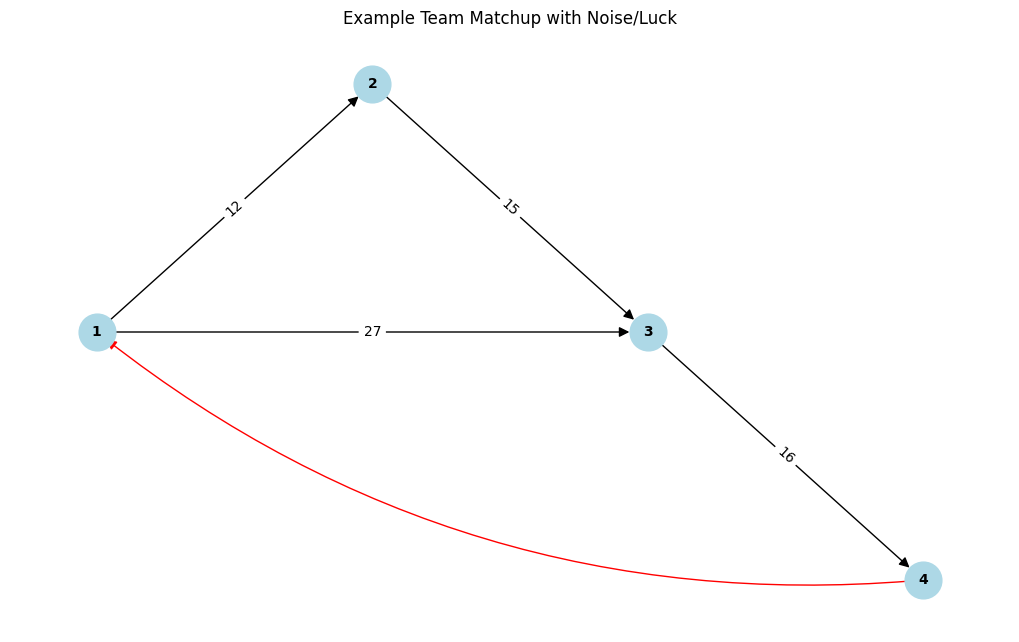

In [51]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0),
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

nx.draw_networkx_edges(G, pos, edgelist=[(4, 1, 20)], edge_color='red', connectionstyle='arc3,rad=-0.2', arrows=True, arrowstyle='-|>', arrowsize=15)


# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



plt.title("Example Team Matchup with Noise/Luck")
plt.show()
